In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("housing-2.csv")
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
print(df.columns)

(20640, 10)
(20433, 10)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [5]:
feature_list = ['housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']

In [ ]:
df.drop(index = df[df.total_rooms > 4500].index, axis = 0, inplace = True)
print(df.shape)


(18233, 10)


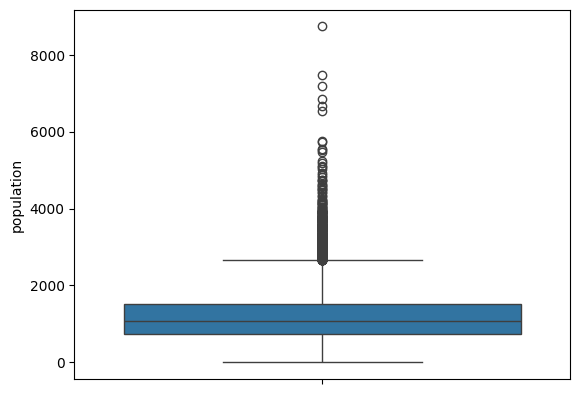

In [ ]:
sns.boxplot(df.population)
plt.show()

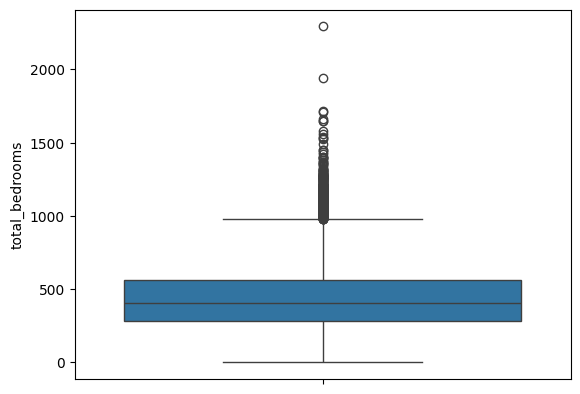

In [ ]:
sns.boxplot(df.total_bedrooms)
plt.show()

In [ ]:
df.drop(index = df[df.total_bedrooms > 870].index, axis = 0, inplace = True)
print(df.shape)

(17487, 10)


In [ ]:
df.drop(index = df[df.households > 800].index, axis = 0, inplace = True)
print(df.shape)

(17364, 10)


In [ ]:
df.drop(index = df[df.total_rooms > 4350].index, axis = 0, inplace = True)
print(df.shape)

(17254, 10)


In [ ]:
df.drop(index = df[df.median_income > 7.6].index, axis = 0, inplace = True)
print(df.shape)

(16568, 10)


count    16568.000000
mean         3.563564
std          1.431355
min          0.499900
25%          2.467350
50%          3.390600
75%          4.494600
max          7.599200
Name: median_income, dtype: float64


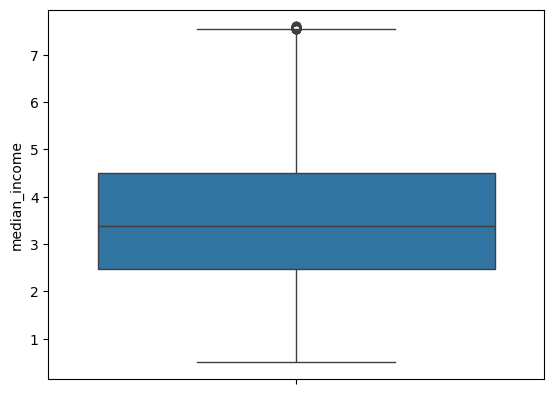

In [ ]:
print(df['median_income'].describe())
sns.boxplot(df.median_income)
plt.show()

In [ ]:
df.drop(index = df[df.population > 2200].index, axis = 0, inplace = True)
print(df.shape)

(15879, 10)


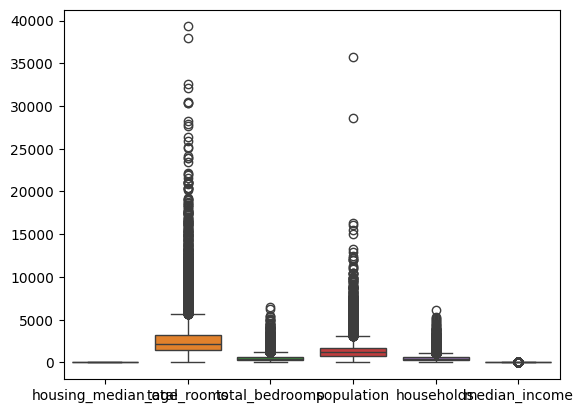

In [6]:
X = df[feature_list]
Y = df['median_house_value']
sns.boxplot(X)
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline

In [11]:
model = LinearRegression()
trans = PowerTransformer(method = 'yeo-johnson')
X_trans = trans.fit_transform(X)
trans = StandardScaler()

pipeline = make_pipeline(PolynomialFeatures(degree = 3), StandardScaler(), Ridge(alpha = 1))
x_train, x_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.1, random_state = 42)
pipeline.fit(x_train, y_train)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [12]:
y_pred_test = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)

In [13]:
print(y_train[:3])
print(y_pred_train[:3])

5096     124100.0
16972    309700.0
9660      57500.0
Name: median_house_value, dtype: float64
[133768.92226952 264342.44151898 104298.36730328]


In [14]:
MAE = mean_absolute_error(y_train, y_pred_train)
MSE = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred_test)
print(MAE, MSE, r2)

47327.96806493243 4217801607.9997883 0.6856127255998972


(20433, 6)


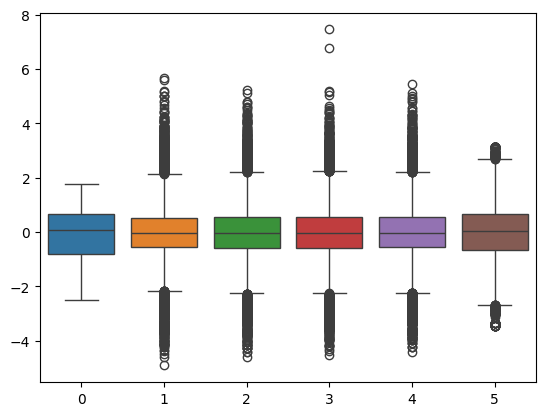

In [ ]:
print(X.shape)
sns.boxplot(x_train)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# Load the dataset
# df = pd.read_csv("housing-2.csv")
print(df.shape)

print(df.columns)

# Impute missing values (using median for total_bedrooms)
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

# Feature engineering
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# One-hot encoding for 'ocean_proximity'
# Removed sparse=False
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(df[["ocean_proximity"]])
# Convert to dense array before creating DataFrame
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(["ocean_proximity"]))

# Combine encoded columns with the rest of the dataframe
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1).drop("ocean_proximity", axis=1)
# print (df_encoded)

# Define features and target
X = df_encoded.drop("median_house_value", axis=1)
Y = df_encoded["median_house_value"]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
pl = make_pipeline(StandardScaler(), LinearRegression())
pl.fit(x_train, y_train)

# Predict and evaluate
y_pred = pl.predict(x_test)
print("Hybrid Linear Regression R² score:", r2_score(y_test, y_pred))

(20433, 10)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Hybrid Linear Regression R² score: 0.6622720986846864


/tmp/ipython-input-47-4248591601.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
print("Ridge R²:", r2_score(y_test, ridge.predict(x_test)))


Ridge R²: 0.5596730443302976


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, test_size=0.2)

model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 16346, number of used features: 6
[LightGBM] [Info] Start training from score 206703.822770
R² Score: 0.6836568830604035
